# Gradient Boosting Classifier for classification of malware

<b>Author</b>: Chan, Chun-Hsiang (<b>TooDou</b>) @ D04228002 NTU GEOG

<div align="justify">
<b>Brief Introduction</b><br />
In this report, we would like to use gradient boost classification as classification approach to classify the different types of malwares. Also we tried different parameters to know which one is the best of all by accuracy. In addition, we applied the heat map to show the confusion matrix in figure.
</div>

In [1]:
# import packages
import os
import pandas as pd

# load dateset
os.getcwd()
os.chdir('/Users/May/Documents/python_code/xgboost_note/malware')
train = pd.read_csv('LargeTrain.csv')
test = pd.read_csv('LargeTest.csv')

In [2]:
# import necessary packages
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# import packages
import sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# features
train_X = train[train.columns[np.arange(1804)]]
# label
classType = train[train.columns[1804]]

In [7]:
# training part
trainDataNum = train_X.shape[0]*0.75
print('Number of Training Data: ', int(trainDataNum))
# test part
testDataNum = train_X.shape[0]*0.25
print('Number of Test Data: ', int(testDataNum))

Number of Training Data:  8151
Number of Test Data:  2717


In [9]:
# training part
trainIndex = np.random.choice(train_X.shape[0], int(trainDataNum), replace=False)
print('Training Data Index: \n', np.sort(trainIndex))
# test part
trainSelect = np.in1d(range(train_X.shape[0]),trainIndex)
print('Test Data Index: \n', np.sort(np.arange(train_X.shape[0])[~trainSelect]))

Training Data Index: 
 [    0     1     5 ..., 10864 10865 10866]
Test Data Index: 
 [    2     3     4 ..., 10857 10860 10867]


In [11]:
# extract training dataset (features and label)
trainData = train_X[trainSelect]
trainClass = classType[trainSelect]
trainData.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
0,3,3,689,18,6,890,6,39,17,88,...,8658.0,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0
1,3,3,583,15,5,1574,5,6,7,30,...,650.0,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0
5,3,3,86,6,2,6,2,0,0,1,...,597.0,474.0,561.0,1389.0,581.0,1537.0,1293.0,1275.0,7048.0,6164.0
6,3,3,469,21,7,291,7,43,15,82,...,15658.0,33452.0,15370.0,63663.0,15581.0,42067.0,63996.0,21127.0,221716.0,176170.0
8,3,3,691,18,6,597,6,30,16,61,...,13626.0,43370.0,13748.0,66715.0,14946.0,39350.0,71793.0,18663.0,219223.0,167493.0


In [12]:
# extract test dataset (features and label)
testData = train_X[~trainSelect]
testClass = classType[~trainSelect]
testData.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
2,3,4,2796,15,5,625,5,58,11,152,...,16918.0,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0
3,3,3,373,27,9,615,9,16,10,34,...,9734.0,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0
4,3,3,77,12,4,66,4,3,0,5,...,1256.0,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0
7,3,3,2090,21,7,4035,7,17,8,40,...,1783.0,1378.0,1901.0,4588.0,2004.0,5550.0,4494.0,2803.0,21692.0,18786.0
10,3,3,1158,9,3,649,3,16,6,17,...,5685.0,21872.0,5509.0,30665.0,5760.0,15170.0,31884.0,7785.0,97977.0,77527.0


In [13]:
# in order to measure the run time of classification, we adopted "timeit" packages to calculate the duration time.
import timeit

In [93]:
# import the packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [159]:
# set the parameters for testing
para_nes = np.array([1100, 1200,1300])

In [108]:
# for the training part
# start to count
start = timeit.default_timer()
# model fitting
# define the parameters
para = parameters[i] 
# build Gradient Boosting Classifier model
gbc_nes_clf1 = GradientBoostingClassifier(n_estimators= para_nes[0], max_depth= 3, subsample= 0.5, learning_rate= 0.01, min_samples_leaf= 1, random_state=3)
# stop to count
stop = timeit.default_timer()
print ('RFC training time: ', stop - start)

RFC training time:  0.00022491795243695378


In [109]:
# for the training part
# start to count
start = timeit.default_timer()
# model fitting
# define the parameters
para = parameters[i] 
# build Gradient Boosting Classifier model
gbc_nes_clf2 = GradientBoostingClassifier(n_estimators= para_nes[1], max_depth= 3, subsample= 0.5, learning_rate= 0.01, min_samples_leaf= 1, random_state=3)
# stop to count
stop = timeit.default_timer()
print ('RFC training time: ', stop - start)

RFC training time:  0.00019228097517043352


In [110]:
# for the training part
# start to count
start = timeit.default_timer()
# model fitting
# define the parameters
para = parameters[i] 
# build Gradient Boosting Classifier model
gbc_nes_clf3 = GradientBoostingClassifier(n_estimators= para_nes[2], max_depth= 3, subsample= 0.5, learning_rate= 0.01, min_samples_leaf= 1, random_state=3)
# stop to count
stop = timeit.default_timer()
print ('RFC training time: ', stop - start)

RFC training time:  0.00017689599189907312


In [ ]:
# fit n_estimators = 1100 model
start = timeit.default_timer()
gbc_nes_clf1.fit(trainData,trainClass)
stop = timeit.default_timer()

In [119]:
# predict by using the test data
gbc_nes_clf1_pred = gbc_nes_clf1.predict(testData)

In [129]:
# generate the confusion matrix
confusion_matrix(testClass, gbc_nes_clf1_pred)

array([[378,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 557,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 765,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 133,   0,   1,   0,   3,   0],
       [  0,   0,   0,   0,  11,   1,   0,   1,   1],
       [  0,   0,   0,   1,   0, 203,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0,  94,   0,   1],
       [  0,   0,   0,   1,   0,   0,   0, 309,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1, 252]])

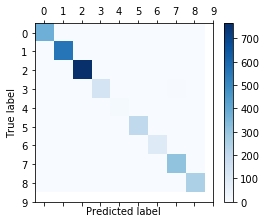

In [130]:
# plot the heat map of confusion matrix
plt.matshow(confusion_matrix(testClass, gbc_nes_clf1_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [121]:
# fit n_estimators = 1200 model
start = timeit.default_timer()
gbc_nes_clf2.fit(trainData,trainClass)
stop = timeit.default_timer()

In [126]:
# predict by using the test data
gbc_nes_clf2_pred = gbc_nes_clf2.predict(testData)
gbc_nes_clf2_pred

array([9, 9, 1, ..., 4, 4, 4])

In [131]:
# generate the confusion matrix
confusion_matrix(testClass, gbc_nes_clf2_pred)

array([[378,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 557,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 765,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 133,   0,   1,   0,   3,   0],
       [  0,   0,   0,   0,  11,   1,   0,   1,   1],
       [  0,   0,   0,   1,   0, 203,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0,  95,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 309,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1, 252]])

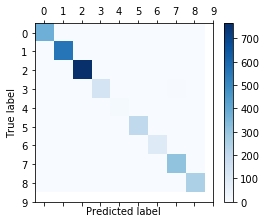

In [132]:
# plot the heat map of confusion matrix
plt.matshow(confusion_matrix(testClass, gbc_nes_clf2_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [127]:
# fit n_estimators = 1300 model
start = timeit.default_timer()
gbc_nes_clf3.fit(trainData,trainClass)
stop = timeit.default_timer()

In [134]:
# predict by using the test data
gbc_nes_clf3_pred = gbc_nes_clf3.predict(testData)
gbc_nes_clf3_pred

array([9, 9, 1, ..., 4, 4, 4])

In [135]:
# generate the confusion matrix
confusion_matrix(testClass, gbc_nes_clf3_pred)

array([[378,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 557,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 765,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 133,   0,   1,   0,   3,   0],
       [  0,   0,   0,   0,  11,   1,   0,   1,   1],
       [  0,   0,   0,   1,   0, 203,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0,  95,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0, 309,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1, 252]])

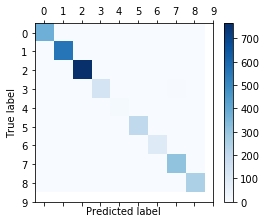

In [136]:
# plot the heat map of confusion matrix
plt.matshow(confusion_matrix(testClass, gbc_nes_clf3_pred), cmap="Blues")
plt.colorbar(shrink=0.8)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [143]:
# compute the accuracy of model 1 and print on the screen
cfm1 = confusion_matrix(testClass, gbc_nes_clf1_pred)
print('Accuracy of cfm1 model: ', 100*cfm1.trace()/sum(sum(cfm1)),'%')

Accuracy of cfm1 model:  99.4479205006 %


In [144]:
# compute the accuracy of model 1 and print on the screen
cfm2 = confusion_matrix(testClass, gbc_nes_clf2_pred)
print('Accuracy of cfm2 model: ', 100*cfm2.trace()/sum(sum(cfm2)),'%')

Accuracy of cfm2 model:  99.4847258005 %


In [145]:
# compute the accuracy of model 1 and print on the screen
cfm3 = confusion_matrix(testClass, gbc_nes_clf3_pred)
print('Accuracy of cfm3 model: ', 100*cfm3.trace()/sum(sum(cfm3)),'%')

Accuracy of cfm3 model:  99.4847258005 %


In [153]:
# 
x = [1100, 1200,1300]
y = [100*cfm1.trace()/sum(sum(cfm1)),100*cfm2.trace()/sum(sum(cfm2)),100*cfm3.trace()/sum(sum(cfm3))]

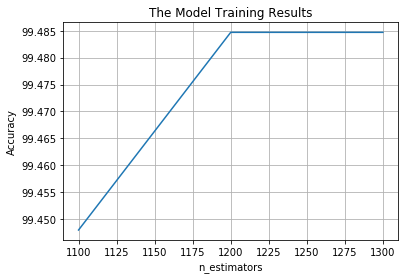

In [157]:
plt.plot(x, y)
plt.title('The Model Training Results')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [158]:
print('The best parameter value of n_estimators are 1200 and 1300')

The best parameter value of n_estimators are 1200 and 1300
